Question 1 (40 pt)

A sample of 30 respondents was interviewed using mall intercept interviewing. The respondents were asked to indicate their degree of agreement with the following statements using a seven-point scale (1 = strongly disagree, 7 = strongly agree).

•	V1 = It is important to buy a toothpaste that prevents cavities

•	V2 = I like a toothpaste that gives a shiny teeth

•	V3 = A toothpaste should strengthen your gums teeth

•	V4 = I prefer a toothpaste that freshens breath

•	V5 = Prevention of tooth decay is not an important benefit offered by a toothpaste

•	V6 = The most important consideration in buying a toothpaste is attractive teeth

By using the variables,

(1) How many factors is extracted from data for principal component analysis?

(2) What is the total percentage of variance explained by these principal components?

(3)Which variables are included in the same factors ? How can you name these factors?

You can find the data at

https://raw.githubusercontent.com/ogut77/DataScience/main/data/Toothpaste.csv

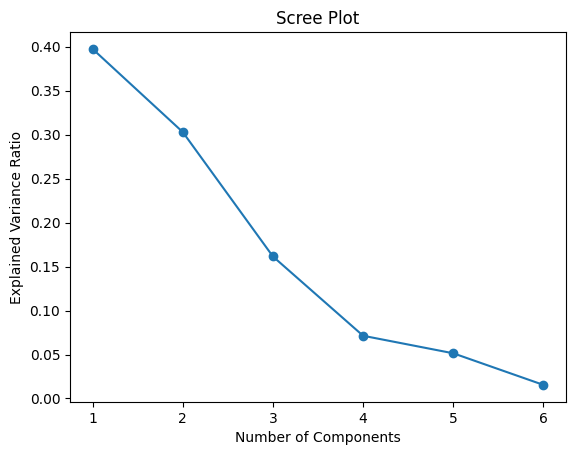

Total percentage of variance explained by the principal components: 1.0


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Toothpaste.csv')

X = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
pca.fit(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

n_components = len(explained_variance_ratio)
total_variance_explained = sum(explained_variance_ratio[:n_components])
component_loadings = pca.components_
print("Total percentage of variance explained by the principal components:", total_variance_explained)

In [ ]:
#Q2 and Q3 is below
# Data description is provided below
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
 #There are missing values in the Lead data .
# Replace missing variables with the mean  if variable is numeric or mode if variable is categorical.
for col in df.columns:
    if ((df[col].dtype == 'float64') or (df[col].dtype == 'float64')) :
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# Check for missing values
df.isnull().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0


In [7]:
#Check that there are no missing data
df.isnull().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0


In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming 'Prospect ID' and 'Lead Number' are present and need to be dropped:
df = df.drop(columns=['Prospect ID', 'Lead Number'], errors='ignore') # errors='ignore' prevents error if columns not found

# Check if 'Converted' column exists, if not, create it with a default value (e.g., 0)
if 'Converted' not in df.columns:
    print("Warning: 'Converted' column not found. Creating it with default value 0.")
    df['Converted'] = 0  # Or any other suitable default value

# Proceed with the rest of your code
y = df['Converted']
X = df.drop(columns=['Converted'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [13]:
def eval(yact,ypred):
 from sklearn import metrics
 print("Accuracy:",metrics.accuracy_score(yact, ypred))
 print("Precision:",metrics.precision_score(yact, ypred))
 print("Recall:",metrics.recall_score(yact, ypred))

 cnf_matrix = metrics.confusion_matrix(yact, ypred)
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 %matplotlib inline
 class_names=[0,1] # name  of classes
 fig, ax = plt.subplots()
 tick_marks = np.arange(len(class_names))
 plt.xticks(tick_marks, class_names)
 plt.yticks(tick_marks, class_names)
 # create heatmap
 sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
 ax.xaxis.set_label_position("top")
 plt.tight_layout()
 plt.title('Confusion matrix', y=1.1)
 plt.ylabel('Actual label')
 plt.xlabel('Predicted label')


In [1]:
!pip install pycaret

In [4]:
#Q2(30 pt)-Using pycaret AutoML tools,make prediction on test data and evaluate performance of prediction using eval function defined above.
from pycaret.classification import *
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataframe again (assuming the URL is still valid)
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')


target_column = 'Converted'

if target_column not in df.columns:
    raise KeyError(f"The '{target_column}' column is not found in the DataFrame. "
                   f"Please ensure you have the correct target variable.")

df = df.drop(columns=['Prospect ID', 'Lead Number'], errors='ignore')

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=[target_column]), df[target_column], test_size=0.30, random_state=42
)

clf = setup(data=pd.concat([X_train, y_train], axis=1), target=target_column, session_id=123)

best_model = compare_models()
model = create_model(best_model)
tuned_model = tune_model(model)
predictions = predict_model(tuned_model, data=X_test)
final_model = finalize_model(tuned_model)
predictions = predict_model(final_model, data=X_test)

def eval(yact, ypred):
    from sklearn import metrics
    print("Accuracy:", metrics.accuracy_score(yact, ypred))
    print("Precision:", metrics.precision_score(yact, ypred))
    print("Recall:", metrics.recall_score(yact, ypred))

    cnf_matrix = metrics.confusion_matrix(yact, ypred)

,Description,Value
0,Session id,123
1,Target,Converted
2,Target type,Binary
3,Original data shape,"(6468, 35)"
4,Transformed data shape,"(6468, 155)"
5,Transformed train set shape,"(4527, 155)"
6,Transformed test set shape,"(1941, 155)"
7,Numeric features,5
8,Categorical features,29
9,Rows with missing values,79.0%


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9351,0.9771,0.9063,0.9234,0.9146,0.8622,0.8625,3.4740
xgboost,Extreme Gradient Boosting,0.9317,0.9744,0.9069,0.9149,0.9107,0.8555,0.8557,1.3270
gbc,Gradient Boosting Classifier,0.9313,0.9764,0.8994,0.9199,0.9094,0.8541,0.8544,2.3510
rf,Random Forest Classifier,0.9291,0.9726,0.8913,0.9217,0.9060,0.8491,0.8497,1.7610
et,Extra Trees Classifier,0.9267,0.9698,0.8833,0.9225,0.9023,0.8437,0.8443,1.9410
ada,Ada Boost Classifier,0.9172,0.9681,0.8689,0.9115,0.8896,0.8234,0.8241,1.3500
lr,Logistic Regression,0.9167,0.9694,0.8764,0.9044,0.8901,0.8231,0.8235,2.9930
lda,Linear Discriminant Analysis,0.9145,0.9671,0.8632,0.9097,0.8858,0.8176,0.8183,0.8350
ridge,Ridge Classifier,0.9143,0.9677,0.8632,0.9092,0.8855,0.8171,0.8179,0.7710
dt,Decision Tree Classifier,0.8957,0.8921,0.8729,0.8581,0.8654,0.7803,0.7805,0.9860


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9625,0.9867,0.9425,0.9591,0.9507,0.9204,0.9205
1,0.9205,0.9708,0.8736,0.9157,0.8941,0.8306,0.8312
2,0.9514,0.9796,0.9368,0.9368,0.9368,0.8974,0.8974
3,0.9294,0.9734,0.9023,0.9128,0.9075,0.8504,0.8504
4,0.9205,0.9693,0.8851,0.9059,0.8953,0.8313,0.8315
5,0.9272,0.9818,0.8678,0.9379,0.9015,0.8438,0.8454
6,0.9316,0.9716,0.9023,0.9181,0.9101,0.8549,0.8550
7,0.9535,0.9865,0.9364,0.9419,0.9391,0.9016,0.9016
8,0.9336,0.9781,0.9310,0.9000,0.9153,0.8607,0.8611


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9581,0.9876,0.9425,0.9480,0.9452,0.9113,0.9113
1,0.9227,0.9678,0.8908,0.9064,0.8986,0.8362,0.8363
2,0.9382,0.9727,0.9195,0.9195,0.9195,0.8694,0.8694
3,0.9139,0.9702,0.8736,0.8994,0.8863,0.8170,0.8173
4,0.9249,0.9666,0.8851,0.9167,0.9006,0.8403,0.8407
5,0.9294,0.9831,0.8851,0.9277,0.9059,0.8494,0.8500
6,0.9249,0.9754,0.8908,0.9118,0.9012,0.8407,0.8408
7,0.9558,0.9818,0.9538,0.9322,0.9429,0.9068,0.9069
8,0.9226,0.9737,0.9195,0.8840,0.9014,0.8377,0.8381


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [8]:
!pip install autogluon.tabular[all]

INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.2/266.2 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.

In [9]:

#Q3(30 pt)-Using Autogluon AutoML tools, make prediction on test data and
# evaluate performance of prediction using eval function defined above.

from autogluon.tabular import TabularPredictor
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have the 'df' DataFrame loaded with your data:
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')
df = df.drop(columns=['Prospect ID', 'Lead Number'], errors='ignore')

# Assuming 'Converted' is the target column
target_column = 'Converted'

# Check if the target column exists in the DataFrame
if target_column not in df.columns:
    raise KeyError(f"The '{target_column}' column is not found in the DataFrame. "
                   f"Please ensure you have the correct target variable.")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=[target_column]), df[target_column], test_size=0.30, random_state=42
)

# Train AutoGluon model
predictor = TabularPredictor(label=target_column, eval_metric='accuracy').fit(
    train_data=pd.concat([X_train, y_train], axis=1),
    #verbosity=0  # Set to 0 to suppress detailed output during training
)

# Make predictions on the test set
y_pred = predictor.predict(X_test)

# Evaluate performance using the eval function
eval(y_test, y_pred)

No path specified. Models will be saved in: "AutogluonModels/ag-20250428_102621"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       11.32 GB / 12.67 GB (89.3%)
Disk Space Avail:   61.57 GB / 107.72 GB (57.2%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

Accuracy: 0.9491341991341992
Precision: 0.94234404536862
Recall: 0.9257195914577531
